# Создание файлa выгруженных данных для дашборда  

## 1. Загрузка данных

In [25]:
import pandas as pd
from sqlalchemy import create_engine
from matplotlib import pyplot as plt

In [1]:
pip install psycopg2

Note: you may need to restart the kernel to use updated packages.


In [2]:


db_config = {'user': 'praktikum_student', # имя пользователя
            'pwd': 'Sdf4$2;d-d30pp', # пароль
            'host': 'rc1b-wcoijxj3yxfsf3fs.mdb.yandexcloud.net',
            'port': 6432, # порт подключения
            'db': 'data-analyst-zen-project-db'} # название базы данных

connection_string = 'postgresql://{}:{}@{}:{}/{}'.format(db_config['user'],
                                                db_config['pwd'],
                                                db_config['host'],
                                                db_config['port'],
                                                db_config['db'])

engine = create_engine(connection_string) 

In [3]:
query = ''' SELECT *
            FROM dash_visits
        '''

In [4]:
dash_visits = pd.io.sql.read_sql(query, con = engine) 

In [30]:
dash_visits.head()

,record_id,item_topic,source_topic,age_segment,dt,visits
0,1040597,Деньги,Авто,18-25,2019-09-24 18:32:00,3
1,1040598,Деньги,Авто,18-25,2019-09-24 18:35:00,1
2,1040599,Деньги,Авто,18-25,2019-09-24 18:54:00,4
3,1040600,Деньги,Авто,18-25,2019-09-24 18:55:00,17
4,1040601,Деньги,Авто,18-25,2019-09-24 18:56:00,27


## 2. Предобработка данных

In [6]:
dash_visits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30745 entries, 0 to 30744
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   record_id     30745 non-null  int64         
 1   item_topic    30745 non-null  object        
 2   source_topic  30745 non-null  object        
 3   age_segment   30745 non-null  object        
 4   dt            30745 non-null  datetime64[ns]
 5   visits        30745 non-null  int64         
dtypes: datetime64[ns](1), int64(2), object(3)
memory usage: 1.4+ MB


In [7]:
dash_visits['item_topic'].value_counts()

Отношения             1536
Интересные факты      1535
Наука                 1505
Подборки              1456
Полезные советы       1424
Общество              1422
Россия                1385
История               1363
Семья                 1287
Путешествия           1247
Деньги                1234
Женщины               1230
Дети                  1229
Туризм                1206
Здоровье              1203
Красота               1193
Культура              1160
Юмор                  1129
Искусство             1119
Рассказы              1109
Психология            1056
Скандалы              1023
Знаменитости           976
Женская психология     914
Шоу                    804
Name: item_topic, dtype: int64

In [12]:
dash_visits['record_id'].nunique()

30745

In [13]:
dash_visits['source_topic'].value_counts()

Семейные отношения    1822
Россия                1687
Знаменитости          1650
Полезные советы       1578
Путешествия           1563
Кино                  1505
Дети                  1459
История               1437
Семья                 1405
Одежда                1379
Здоровье              1243
Искусство             1228
Авто                  1077
Психология            1055
Сад и дача            1036
Политика              1024
Спорт                 1007
Сделай сам             995
Ремонт                 985
Деньги                 973
Еда                    912
Интерьеры              809
Строительство          758
Музыка                 750
Технологии             741
Финансы                667
Name: source_topic, dtype: int64

In [19]:
dash_visits['age_segment'].value_counts()

18-25    7056
26-30    5875
31-35    5552
36-40    5105
41-45    3903
45+      3254
Name: age_segment, dtype: int64

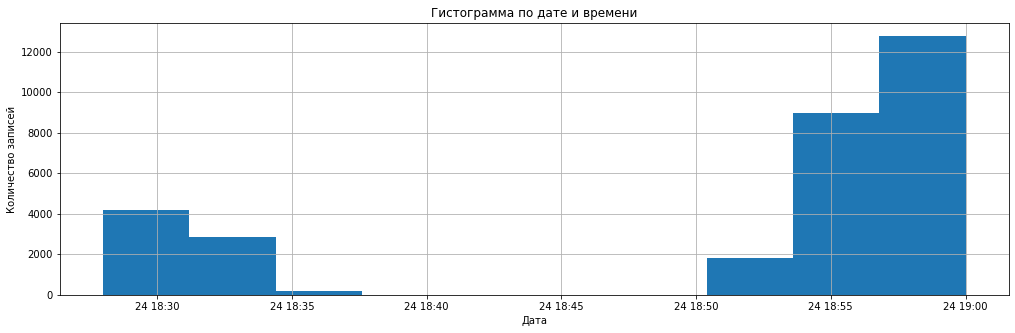

In [28]:
dash_visits['dt'].hist(figsize = (17,5))
plt.title('Гистограмма по дате и времени')
plt.xlabel('Дата')
plt.ylabel('Количество записей')
plt.show()

У нас данные только за один день

In [9]:
dash_visits['visits'].describe()

count    30745.000000
mean        10.089673
std         19.727601
min          1.000000
25%          1.000000
50%          3.000000
75%         10.000000
max        371.000000
Name: visits, dtype: float64

Здесь мы видим минимальное, максимальное, среднее и т.д. число визитов 

In [31]:
#загружаю данные на свой пк
#dash_visits.to_csv(r'C:\scripts\test\Dash_visits.csv', index = False)

In [32]:
query = ''' SELECT *
            FROM log_raw
        '''

In [33]:
log_raw = pd.io.sql.read_sql(query, con = engine) 

In [35]:
log_raw.head()

,event_id,age_segment,event,item_id,item_topic,item_type,source_id,source_topic,source_type,ts,user_id
0,2931262,18-25,show,1793260,Красота,native,8388799,История,publisher,1569349657638,2185026
1,2931277,18-25,show,7465641,Культура,native,5837959,История,publisher,1569349657971,6845238
2,2931285,18-25,show,406073,История,url,2335872,Сад и дача,domain,1569349658408,5244363
3,2931247,26-30,show,752665,Путешествия,native,6963489,Здоровье,publisher,1569349657189,7553074
4,2931278,26-30,click,6843081,Юмор,url,5427748,Семейные отношения,domain,1569349658054,1317585
...,...,...,...,...,...,...,...,...,...,...,...
322386,4396804,31-35,click,7273256,Наука,native,5451530,Сад и дача,publisher,1569351658610,1351271
322387,4396814,31-35,show,4094446,Женская психология,narrative_card,4001238,Психология,publisher,1569351658738,4466455
322388,4396836,18-25,show,5003354,Интересные факты,url,6371686,Полезные советы,domain,1569351659030,4916583
322389,4396846,18-25,click,39740,Отношения,narrative_card,9829090,Семейные отношения,publisher,1569351659233,7962286


In [37]:
log_raw['event'].value_counts()

show     277969
click     23235
view      21187
Name: event, dtype: int64

# Ccылка на дашборд

Дашборд: <https://public.tableau.com/app/profile/.22726600/viz/_16538339450020/Dashboard1?publish=yes>

# Ccылка на презентацию

Презентация: <https://drive.google.com/file/d/1CUjC1XPPbQu3iWl0z9IRXdlGn4JlClaB/view?usp=sharing>